# TF Classification

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv("pima-indians-diabetes.csv")

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [27]:
# Valores contínuos (numéricos)

num_preg = tf.feature_column.numeric_column("Number_pregnant")
plasma_gluc = tf.feature_column.numeric_column("Glucose_concentration")
dias_press = tf.feature_column.numeric_column("Blood_pressure")
tricep = tf.feature_column.numeric_column("Triceps")
insulin = tf.feature_column.numeric_column("Insulin")
bmi = tf.feature_column.numeric_column("BMI")
diabetes_pedigree = tf.feature_column.numeric_column("Pedigree")
age = tf.feature_column.numeric_column("Age")

In [28]:
# Valores categóricos

assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group", ["A", "B", "C", "D"])

In [29]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket("Group", hash_bucket_size=10)

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

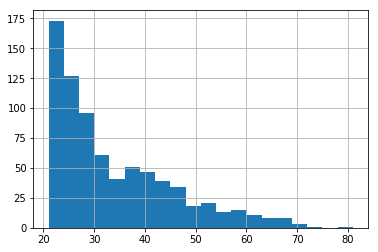

In [31]:
diabetes["Age"].hist(bins=20)

In [32]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [33]:
age_bucket

BucketizedColumn(source_column=NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))

In [34]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

In [35]:
# Train test split

In [36]:
x_data = diabetes.drop("Class", axis=1)

In [37]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [38]:
labels = diabetes["Class"]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [41]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=100, shuffle=True)

In [42]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpsvx28jqu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcbdeecd390>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [43]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpsvx28jqu/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 272.119
INFO:tensorflow:loss = 5.1718936, step = 101 (0.369 sec)
INFO:tensorflow:global_step/sec: 620.752
INFO:tensorflow:loss = 5.611019, step = 201 (0.160 sec)
INFO:tensorflow:global_step/sec: 624.289
INFO:tensorflow:loss = 5.408838, step = 301 (0.160 sec)
INFO:tensorflow:global_step/sec: 668.328
INFO:tensorflow:loss = 3.3113887, step = 401 (0.152 sec)
INFO:tensorflow:global_step/sec: 613.612
INFO:tensorflow:loss = 6.66399, step = 501 (0.161 sec)
INFO:tensorflow:global_step/sec: 496.412
INFO:tensorflow:loss = 5.111904, ste

In [44]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [45]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28T14:29:13Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpsvx28jqu/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-28-14:29:14
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.8047325, auc_precision_recall = 0.6457369, average_loss = 0.5248162, global_step = 1000, label/mean = 0.35064936, loss = 5.051356, precision = 0.671875, prediction/mean = 0.35913548, recall = 0.5308642
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpsvx28jqu/model.ckpt-1000


In [46]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8047325,
 'auc_precision_recall': 0.6457369,
 'average_loss': 0.5248162,
 'label/mean': 0.35064936,
 'loss': 5.051356,
 'precision': 0.671875,
 'prediction/mean': 0.35913548,
 'recall': 0.5308642,
 'global_step': 1000}

In [47]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [49]:
predictions = model.predict(pred_input_func)

In [50]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsvx28jqu/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [51]:
my_pred

[{'logits': array([0.04732829], dtype=float32),
  'logistic': array([0.51182985], dtype=float32),
  'probabilities': array([0.48817012, 0.51182985], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.50434834], dtype=float32),
  'logistic': array([0.6234807], dtype=float32),
  'probabilities': array([0.37651935, 0.6234807 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.6129117], dtype=float32),
  'logistic': array([0.3513953], dtype=float32),
  'probabilities': array([0.6486047 , 0.35139528], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.64887846], dtype=float32),
  'logistic': array([0.34324235], dtype=float32),
  'probabilities': array([0.65675765, 0.3432423 ], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.7195027], dtype=float32),
  'logistic':

In [54]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feat_cols, n_classes=2) # 10 neurônios, 10 camadas, cada neurônio conectado a 10

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp_f5bh0kt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcbde739588>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [55]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [56]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [57]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [58]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [63]:
dnn_model = tf.estimator.DNNClassifier([10, 20, 20, 10, 10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpapg63_ez', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcbde6c8a58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [64]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpapg63_ez/model.ckpt.
INFO:tensorflow:loss = 6.930315, step = 1
INFO:tensorflow:global_step/sec: 388.846
INFO:tensorflow:loss = 5.336265, step = 101 (0.262 sec)
INFO:tensorflow:global_step/sec: 620.833
INFO:tensorflow:loss = 5.555698, step = 201 (0.159 sec)
INFO:tensorflow:global_step/sec: 514.874
INFO:tensorflow:loss = 6.9833727, step = 301 (0.197 sec)
INFO:tensorflow:global_step/sec: 505.658
INFO:tensorflow:loss = 6.7658653, step = 401 (0.196 sec)
INFO:tensorflow:global_step/sec: 588.866
INFO:tensorflow:loss = 4.0235853, step = 501 (0.170 sec)
INFO:tensorflow:global_step/sec: 627.254
INFO:tensorflow:loss = 2.8206148, step = 601 (0.159 sec)
INFO:tensorflow:global_step/sec: 440.752
INFO:tensorflow:los

In [65]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [66]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28T14:47:53Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpapg63_ez/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-28-14:47:54
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7532467, accuracy_baseline = 0.64935064, auc = 0.8265432, auc_precision_recall = 0.71608484, average_loss = 0.488273, global_step = 1000, label/mean = 0.35064936, loss = 4.6996274, precision = 0.65384614, prediction/mean = 0.3663271, recall = 0.6296296
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpapg63_ez/model.ckpt-1000


{'accuracy': 0.7532467,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8265432,
 'auc_precision_recall': 0.71608484,
 'average_loss': 0.488273,
 'label/mean': 0.35064936,
 'loss': 4.6996274,
 'precision': 0.65384614,
 'prediction/mean': 0.3663271,
 'recall': 0.6296296,
 'global_step': 1000}

In [70]:
df = pd.read_csv("Co.csv")

In [71]:
df.head()

,Timestamp,Paper title,Paper reference,CCDC code,Charge,Total multiplicity,D (cm-1),Mol (v3000) file,CIF file,PDF of the paper
0,3/23/2019 14:33:43,Single-ion magnetic anisotropy in a vacant oct...,"Dalton Trans., 2019,48, 25-29",VIQWEA,1,4,47,\n Mrv1827 03231914223D \n\n 0 0 ...,https://drive.google.com/open?id=1WL7IWMwJJPvJ...,https://drive.google.com/open?id=1Qi-yyazVGlCk...


In [75]:
print(df["Mol (v3000) file"][0])


  Mrv1827 03231914223D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 114 125 0 0 0
M  V30 BEGIN ATOM
M  V30 1 Co 3.8695 4.7687 10.021 0 CHG=1
M  V30 2 Cl 4.9987 5.9302 11.7546 0
M  V30 3 P 5.4527 3.1803 9.7584 0 CFG=1
M  V30 4 P 3.0493 3.2426 11.5188 0 CFG=1
M  V30 5 C 4.4941 2.2985 12.1382 0
M  V30 6 C 5.6551 2.3664 11.3775 0
M  V30 7 C 4.8966 1.7946 8.7146 0
M  V30 8 C 2.2458 3.6512 13.1127 0
M  V30 9 C 7.1307 3.5802 9.2119 0
M  V30 10 C 1.9227 2.0141 10.7769 0
M  V30 11 C 3.8288 1.9915 7.851 0
M  V30 12 H 3.4625 2.8621 7.7488 0
M  V30 13 C 4.4831 1.5693 13.3271 0
M  V30 14 H 3.6848 1.4952 13.8357 0
M  V30 15 C 8.8505 3.6433 7.5207 0
M  V30 16 H 9.1711 3.3942 6.6623 0
M  V30 17 C 7.611 3.189 7.9577 0
M  V30 18 H 7.0924 2.6141 7.4066 0
M  V30 19 C 7.9079 4.3989 10.0229 0
M  V30 20 H 7.5861 4.668 10.8753 0
M  V30 21 C 6.83 1.757 11.8322 0
M  V30 22 H 7.629 1.8205 11.3214 0
M  V30 23 C 2.9689 4.4119 14.0419 0
M  V30 24 H 3.809 4.7837 13.8006 0
M  V3